#                 COVID-19 Live Data Scraping From Worldometer.info

<p>Despite incredible efforts by scientists around the world, there is still much we do not understand, and we are all now part of a planet-wide experiment trying to find answers.
Here are some of the big outstanding questions.
It is one of the most basic questions, but also one of the most crucial.

There have been hundreds of thousands of confirmed cases around the world, but this is only a fraction of the total number of infections. And the figures are further confused by an unknown number of asymptomatic cases - people who have the virus but don't feel ill.

Developing an antibody test will allow researchers to see whether anyone has had the virus. Only then will we understand how far or how easily the coronavirus is spreading.

In this Notebook I am scraping the coronavirus spreading data from worldometer.info </p>

### Install all the required Library
<li>BeautifulSoup</li>
<li>Pandas</li>
<li>Numpy</li>
<li>Matplotlib</li>

### Importing All the Library

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("All the Library has been Installed")

All the Library has been Installed


In [2]:
my_url = "https://www.worldometers.info/coronavirus/"
html = requests.get(my_url)

In [3]:
soup = BeautifulSoup(html.content, "html5lib")
soup_for_last_update_time = BeautifulSoup(html.content, "html5lib")

In [4]:
for_time = soup_for_last_update_time.findAll("div",{"class":"content-inner"})
last_updated_time = for_time[0].findAll('div')[1].text
table = soup.tbody.findAll("tr")

In [5]:
single_contry_info = []
for row in table:
    country_data_list = []
    country_info = row.findAll("td")
    for value in country_info:
        country_data = value.text.strip().replace(",","")
        if (country_data ==''):
            country_data  = 0
        country_data_list.append(country_data)
    country_data_list
    single_contry_info.append(country_data_list)
header = ["country", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_recovered", "active_cases",
                  "serious_condition","total_cases_per1mpop", "total_death_per1mpop", "total_test", "Testper1m"]
df = pd.DataFrame(np.array(single_contry_info), columns = header)
df.drop(df[df["country"]=="World"].index, axis =0, inplace=True)
df.reset_index(inplace=True)
df.drop(["index"], axis =1, inplace=True)
df['country'] = df['country'].str.replace(" ","%")

### Adding a death Rate columns
<p>Death Rate(%) = (Total Death/Total Infected Cases)*100</p>

In [6]:
cols = df.columns.drop(["country"])
df[cols] = df[cols].apply(pd.to_numeric)
df["death_rate"]=df['total_deaths']/df['total_cases']*100

In [7]:
global_coronavirus_cases = df.total_cases.sum()
global_active_cases = df.active_cases.sum()
global_total_death = df.total_deaths.sum()
global_recovered = df.total_recovered.sum()
global_data_for_pi = [global_active_cases, global_recovered, global_total_death]
global_label_for_pi = ['Active Cases', "Total Recovered", "Total Death"]

In [8]:
global_data_sum = df.sum().drop(["country","death_rate"])
global_data = pd.DataFrame(global_data_sum).transpose()
global_data.insert(loc=0, column = 'country', value = 'Global')
global_data.insert(loc=10, column = '1st_case', value = 'None')
global_data.insert(loc=11, column = 'death_rate', value = (global_data['total_deaths'][0]/global_data['total_cases'][0]*100))

### Creating a dataframe for top 10 country infected coronavirus 

In [9]:
df_sorted = df.sort_values(by = 'total_cases', ascending = False)
df_top_10_country = df_sorted.head(10)
df_top_10_country

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_condition,total_cases_per1mpop,total_death_per1mpop,total_test,Testper1m,death_rate
0,USA,328662,17305,9365,913,16700,302597,8542,993.0,28.0,1726725,5217,2.849432
1,Spain,130759,4591,12418,471,38080,80261,6861,2797.0,266.0,355000,7593,9.496861
2,Italy,128948,4316,15887,525,21815,91246,3977,2133.0,263.0,691461,11436,12.320470
3,Germany,99862,3770,1550,106,28700,69612,3936,1192.0,18.0,918460,10962,1.552142
4,France,89953,0,7560,0,15438,66955,6838,1378.0,116.0,224254,3436,8.404389
209,China,81669,30,3329,3,76964,1376,295,57.0,2.0,0,0,4.076210
5,Iran,58226,2483,3603,151,19736,34887,4103,693.0,43.0,186000,2214,6.187957
6,UK,47806,5903,4934,621,135,42737,1559,704.0,73.0,195524,2880,10.320880
7,Turkey,27069,3135,574,73,1042,25453,1381,321.0,7.0,181445,2151,2.120507
8,Switzerland,21100,595,685,19,6415,14000,391,2438.0,79.0,158000,18256,3.246445


### Creating a dataframe for top 20 country by death rate

In [10]:
df_top20_as_per_death_rate = df.sort_values(by ='death_rate', ascending=False).head(20)

### Creating a dataframe for top 10 country by new cases

In [11]:
df_new_sort_by_new_cases = df.sort_values(by = 'new_cases', ascending = False)
df_new_case_in_top10_country = df_new_sort_by_new_cases.head(10)

### Pie Chrat of Global Data of Active Cases, Recovered, Death

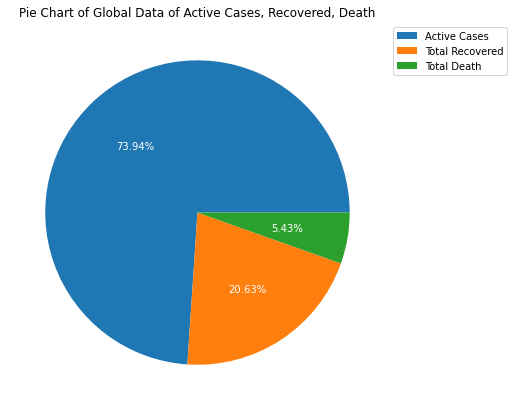

,0
country,Global
total_cases,1258091
new_cases,56638
total_deaths,68287
new_deaths,3599
total_recovered,259554
active_cases,930250
serious_condition,45431
total_cases_per1mpop,89959.5
total_death_per1mpop,3110.59


In [12]:
fig1, ax1 = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
wedges, texts,  autotexts = ax1.pie(global_data_for_pi, autopct='%1.2f%%', textprops=dict(color="w"))
ax1.legend(wedges, global_label_for_pi,
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title('Pie Chart of Global Data of Active Cases, Recovered, Death')
plt.show()
global_data.transpose()

### Bar Chart of Active Cases, Recovered, Death of top 10 country

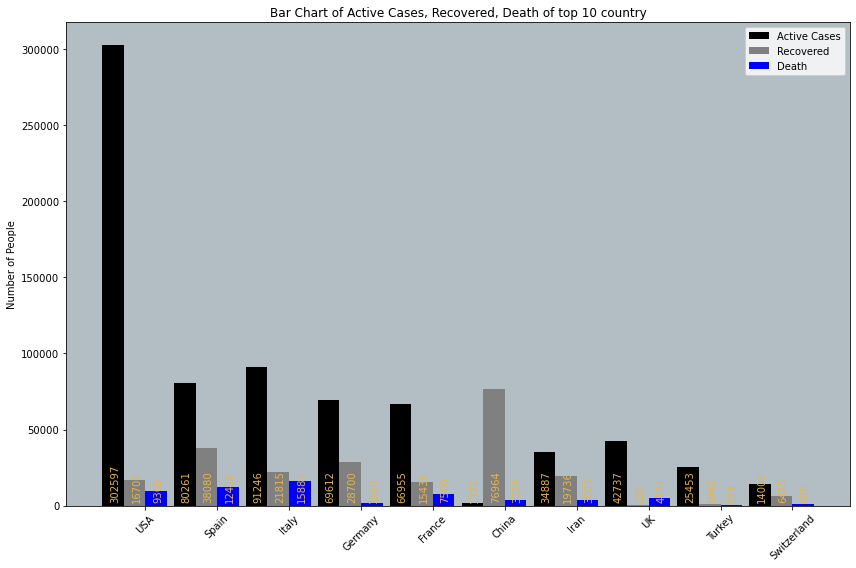

In [13]:
x1 = np.arange(len((df_top_10_country['country'])))  # the label locations
width = 0.3  # the width of the bars
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.set_facecolor('#b2bec3')
rects1 = ax2.bar(x1 - width- width/2, df_top_10_country['active_cases'], width, facecolor = 'Black', label='Active Cases')
rects2 = ax2.bar(x1 - width/2 ,df_top_10_country['total_recovered'], width, facecolor = 'gray', label='Recovered')
rects3 = ax2.bar(x1 + width/2,df_top_10_country['total_deaths'], width, facecolor = 'blue', label='Death')
ax2.set_ylabel('Number of People')
ax2.set_title('Bar Chart of Active Cases, Recovered, Death of top 10 country')
ax2.set_xticks(x1)
ax2.set_xticklabels(df_top_10_country['country'], rotation = 45)
ax2.legend()
def autolabel_1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
autolabel_1(rects1)
autolabel_1(rects2)
autolabel_1(rects3)
fig2.tight_layout()

### Bar Chart of Top 20 country by Death rate(%)

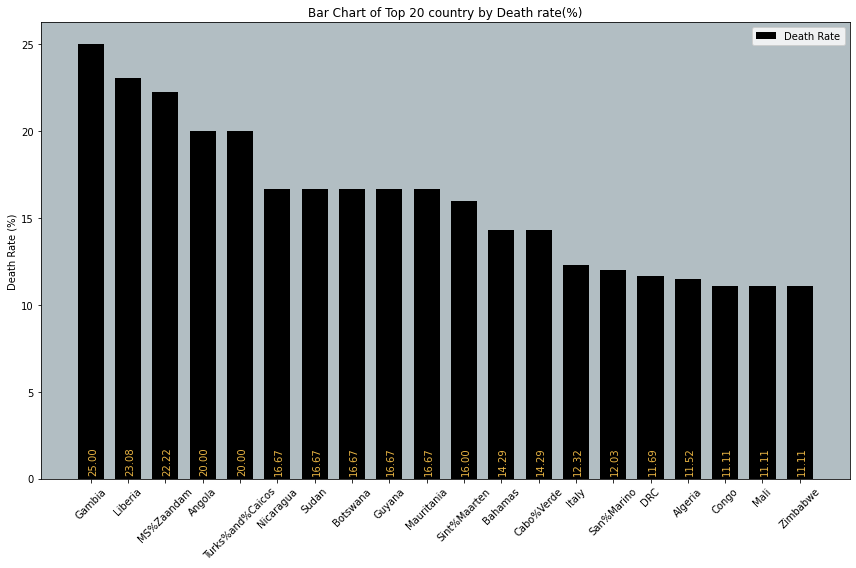

In [14]:
x2 = np.arange(len((df_top20_as_per_death_rate['country'])))  # the label locations
width = .7  # the width of the bars
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.set_facecolor('#b2bec3')
rects4 = ax3.bar(x2, df_top20_as_per_death_rate['death_rate'], width, facecolor = 'Black', label='Death Rate')
ax3.set_ylabel('Death Rate (%)')
ax3.set_title('Bar Chart of Top 20 country by Death rate(%)')
ax3.set_xticks(x2)
ax3.set_xticklabels(df_top20_as_per_death_rate['country'], rotation = 45)
ax3.legend()
def autolabel_2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
autolabel_2(rects4)
fig3.tight_layout()

### Bar Chart of New Cases, New Death by top 10 Country

,0,6,1,2,3,7,5,11,9,10
country,USA,UK,Spain,Italy,Germany,Turkey,Iran,Canada,Belgium,Netherlands
new_cases,17305,5903,4591,4316,3770,3135,2483,1504,1260,1224
new_deaths,913,621,471,525,106,73,151,46,164,115
death_rate,2.84943,10.3209,9.49686,12.3205,1.55214,2.12051,6.18796,1.79683,7.34853,9.893


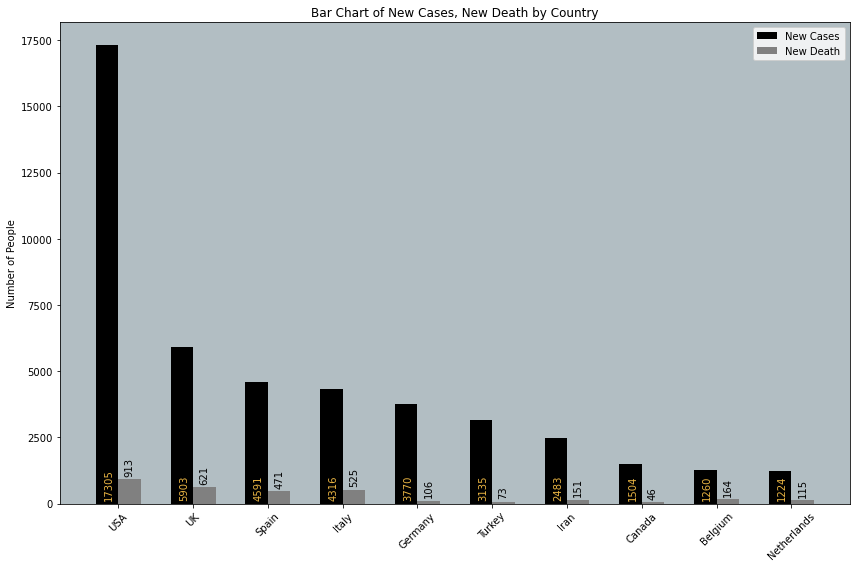

In [15]:
x3 = np.arange(len((df_new_case_in_top10_country['country'])))
width = 0.3
fig4, ax4 = plt.subplots(figsize=(12,8))
ax4.set_facecolor('#b2bec3')
rects5 = ax4.bar(x3 - width/2, df_new_case_in_top10_country['new_cases'], width, facecolor = 'Black', label='New Cases')
rects6 = ax4.bar(x3 + width/2 ,df_new_case_in_top10_country['new_deaths'], width, facecolor = 'gray', label='New Death')
ax4.set_ylabel('Number of People')
ax4.set_title('Bar Chart of New Cases, New Death by Country')
ax4.set_xticks(x3)
ax4.set_xticklabels(df_new_case_in_top10_country['country'], rotation = 45)
ax4.legend()
def autolabel_for_new_cases(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
def autolabel_for_new_death(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+10),
                    xytext=(0, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = 'black',
                    ha='center', va='bottom')
autolabel_for_new_cases(rects5)
autolabel_for_new_death(rects6)
fig4.tight_layout()
df_new_case_in_top10_country[['country','new_cases','new_deaths','death_rate']].transpose()

### Saving the Data in a csv file

In [16]:
csv_file_name = last_updated_time.lstrip("Last updated: ").replace(" ", "_").replace(",", "_").replace(":", "_") + ".csv"
df.to_csv(csv_file_name)

### Display the data of Your Own Country by entering country name

In [17]:
country_name = input()
df[df['country'] == country_name].transpose()

India


,29
country,India
total_cases,3588
new_cases,0
total_deaths,99
new_deaths,0
total_recovered,229
active_cases,3260
serious_condition,0
total_cases_per1mpop,3
total_death_per1mpop,0.07


### Use this Notebook as a Adafruit Client for Display 

#### Install adafruit library

#### Importing Adafruit Library

In [18]:
from Adafruit_IO import Client
aio = Client("yobots", "83a80786ecc642919bcff59eb15548c2")

### I am sending top 10 country, global and my country Data

In [19]:
df_top_10_country = df_top_10_country.append(global_data, ignore_index=True)
df_top_10_country=df_top_10_country.append(df[df['country'] == 'India'],ignore_index=True)

In [20]:
from time import sleep
for country in df_top_10_country['country']:
    country_pos = pd.Index(list(df_top_10_country.country))
    df_transpose = df_top_10_country[df_top_10_country["country"]==country].transpose()
    df_transpose.columns = ['Data']
    data_for_send = str(country_pos.get_loc(country)+1)+"_"+str(df_transpose['Data'][0])+"_"+str(df_transpose['Data'][1])+"_"+str(df_transpose['Data'][2])+"_"+str(df_transpose['Data'][3])+"_"+str(df_transpose['Data'][4])+"_"+str(df_transpose['Data'][5])+"_"+str(df_transpose['Data'][6])+"_"+str('{0:.2f}'.format(df_transpose['Data'][11]))
    aio.send('covid-19', data_for_send)
    aio.send('last-updated-time', last_updated_time)
    sleep(1)
    print(df_transpose)
    print(data_for_send)

                         Data
country                   USA
total_cases            328662
new_cases               17305
total_deaths             9365
new_deaths                913
total_recovered         16700
active_cases           302597
serious_condition        8542
total_cases_per1mpop      993
total_death_per1mpop       28
total_test            1726725
Testper1m                5217
death_rate            2.84943
1st_case                  NaN
1_USA_328662_17305_9365_913_16700_302597_5217.00
                         Data
country                 Spain
total_cases            130759
new_cases                4591
total_deaths            12418
new_deaths                471
total_recovered         38080
active_cases            80261
serious_condition        6861
total_cases_per1mpop     2797
total_death_per1mpop      266
total_test             355000
Testper1m                7593
death_rate            9.49686
1st_case                  NaN
2_Spain_130759_4591_12418_471_38080_80261_7593.00
 